# Sprint 9: Machine Learning in Business Project - OilyGiant 

**Project Description**

I work for the OilyGiant mining company and my task is to find the best place for a new well.

These will be the steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.
- I have data on oil samples from three regions. Parameters of each oil well in the region are already known. I will build a model that will help to pick the region with the highest profit margin. I will analyze potential profit and risks using the Bootstrapping technique.

DATA Description:
- I have been given exploration data for three regions stored in three files. 
 - id — unique oil well identifier
 - f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
 - product — volume of reserves in the oil well (thousand barrels).

CONDITIONS:

- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.

## Download and Prepare Data 

In [1]:
# Importing libraries relevant to project 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Reading the data
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# Review Data for df_0
df_0.info()
display(df_0.shape)
display(df_0.head(10))
display(df_0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(100000, 5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [4]:
# Checking for duplicates
df_0.duplicated().sum()

0

In [5]:
# Checking for missing values
df_0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [38]:
#Checking Correlation
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


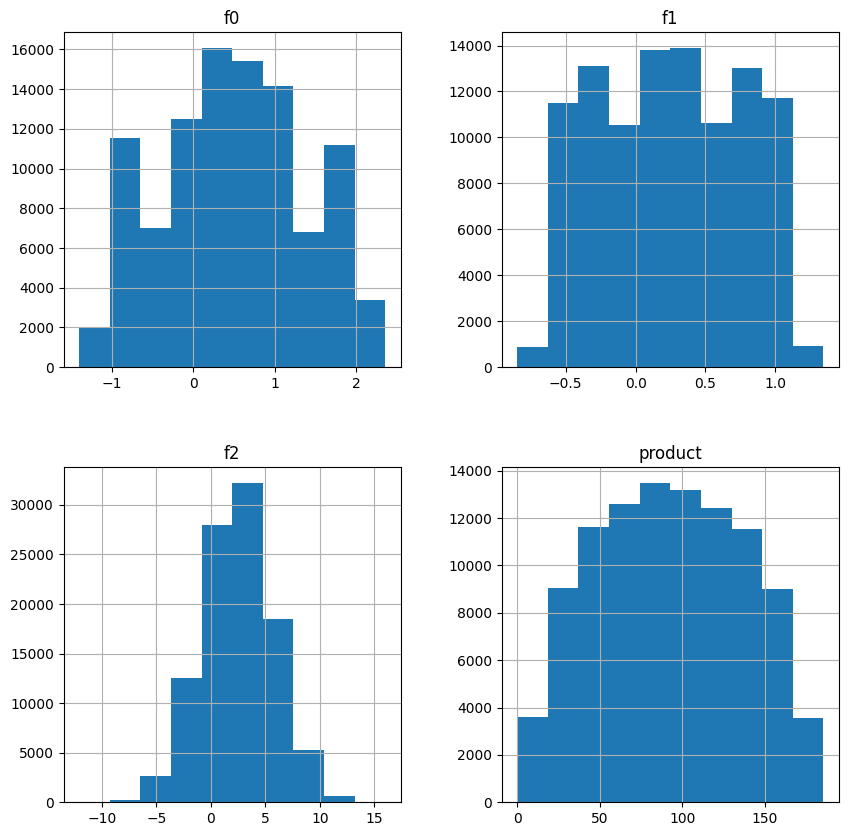

In [35]:
#Plotting Distribution

columns = ['f0', 'f1', 'f2', 'product']
titles = ['f0', 'f1', 'f2', 'product']
def plot_hist(data):
    data.hist(column=columns, figsize=(10,10))

plot_hist(df_0)

**Data Review**
Overall, this data presents very clean. I found no duplicates or missing values. There are 100,000 rows and 5 columns. The mean (0.500419;0.250143;2.502647) and median (0.502360;0.250252;2.515969) values are very close to each other. We can assume there's a reasonable distribution of data. 

In [6]:
# Review Data for df_1
df_1.info()
display(df_1.shape)
display(df_1.head(10))
display(df_1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(100000, 5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [7]:
# Checking for duplicates
df_1.duplicated().sum()

0

In [8]:
# Checking for missing values
df_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [39]:
#Checking Correlation
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


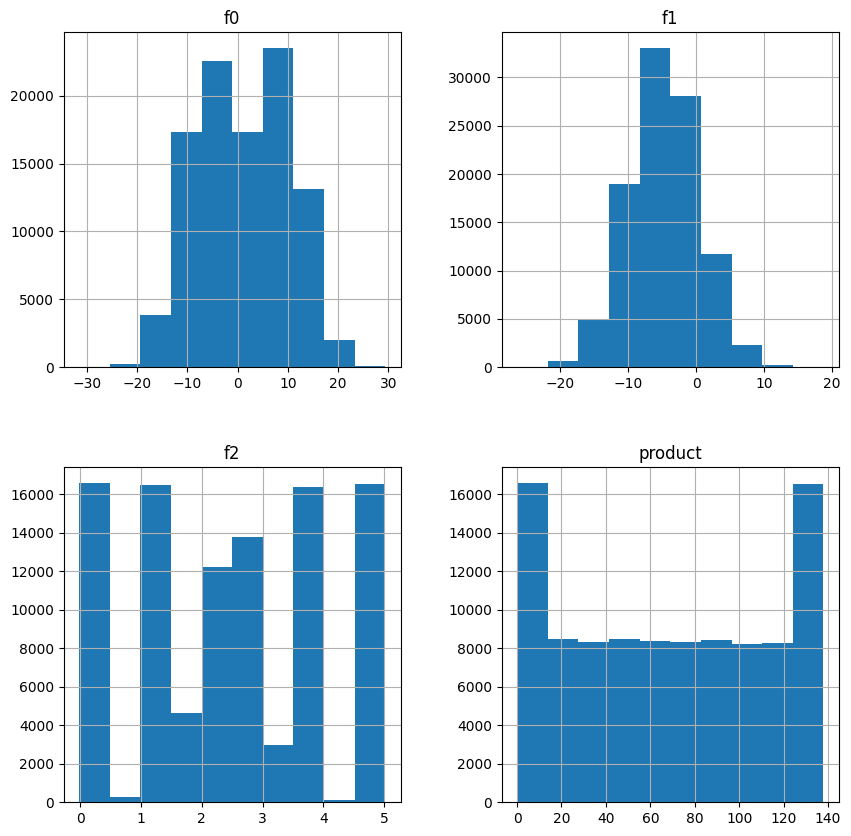

In [36]:
#Plotting Distribution

plot_hist(df_1)

**Data Review**
Yay for another clean set of data! Hooray! There is also 100,000 rows with 5 columns for the data. 

However, compared to the previous dataset, there is a bigger difference between the means and the medians. Most notably so in the f2 and product columns. We can assume that there will be outliers in the dataset. 

In [9]:
# Review Data for df_2
df_2.info()
display(df_2.shape)
display(df_2.head(10))
display(df_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(100000, 5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [10]:
# Checking for duplicates
df_2.duplicated().sum()

0

In [11]:
# Checking for missing values
df_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [40]:
#Checking Correlation
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


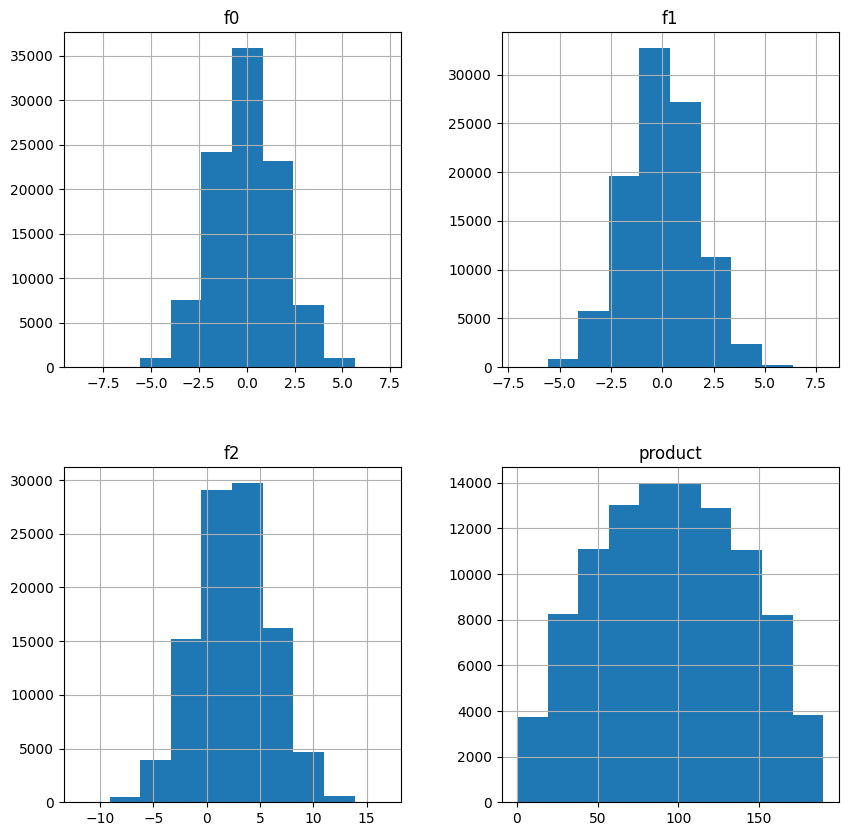

In [37]:
#Plotting Distribution

plot_hist(df_2)

**Data Review** 3/3 Clean datasets! It's a Christmas miracle! LOL. There is also 100,000 rows and 5 columns for this data as well. 

We can assume that there will be outliers due to the values of the means and medians, but in the f0 and f1 columns of this data. 

## Train and Test Models

**REGION ONE**


In [12]:
# Splitting Data
train_0, valid_0 = train_test_split(df_0, test_size=0.25, random_state=12345, shuffle=True)

# Training Data Split
features_train_0 = train_0.drop(['id', 'product'], axis=1)
target_train_0 = train_0['product']

# Validation Data Split
features_valid_0 = valid_0.drop(['id', 'product'], axis=1)
target_valid_0 = valid_0['product']

# Standardizing the Features
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_0[numeric])
features_train_0[numeric] = scaler.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler.transform(features_valid_0[numeric])

print(features_train_0.shape)

print(features_valid_0.shape)

print(features_train_0.head())



(75000, 3)
(25000, 3)
             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181


In [13]:
# Training and Evaluating the Model

#Initialization
lr_0 = LinearRegression() 

#Fitting the model to the training data for df_0
lr_0.fit(features_train_0, target_train_0)

#Predicting the validation data for df_0
lr_0_predicted = lr_0.predict(features_valid_0) 

#Calculating MSE of the Model
mse_0 = mean_squared_error(target_valid_0, lr_0_predicted)
pred_target_df_0 = pd.DataFrame({'y_pred': lr_0_predicted, 'target': target_valid_0})

print('The Average Volume of Predicted Reserves in Region 1 is:', lr_0_predicted.mean())
print('The RMSE of the Model is:', mse_0 ** 0.5 )

The Average Volume of Predicted Reserves in Region 1 is: 92.59256778438035
The RMSE of the Model is: 37.5794217150813


**REGION TWO**

In [14]:
# Splitting Data
train_1, valid_1 = train_test_split(df_1, test_size=0.25, random_state=12345, shuffle=True)

# Training Data Split
features_train_1 = train_1.drop(['id', 'product'], axis=1)
target_train_1 = train_1['product']

# Validation Data Split
features_valid_1 = valid_1.drop(['id', 'product'], axis=1)
target_valid_1 = valid_1['product']

# Standardizing the Features
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_1[numeric])
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

print(features_train_1.shape)

print(features_valid_1.shape)

print(features_train_1.head())

(75000, 3)
(25000, 3)
             f0        f1        f2
27212 -0.850855  0.624428  0.296943
7866   1.971935  1.832275  0.294333
62041  1.079305  0.170127 -0.296418
70185 -1.512028 -0.887837 -0.880471
82230 -1.804775 -0.718311 -0.293255


In [15]:
# Training and Evaluating the Model

#Initialization
lr_1 = LinearRegression() 

#Fitting the model to the training data for df_1
lr_1.fit(features_train_1, target_train_1)

#Predicting the validation data for df_1
lr_1_predicted = lr_1.predict(features_valid_1) 

#Calculating MSE of the Model
mse_1 = mean_squared_error(target_valid_1, lr_1_predicted)
pred_target_df_1 = pd.DataFrame({'y_pred': lr_1_predicted, 'target': target_valid_1})

print('The Average Volume of Predicted Reserves in Region 2 is:', lr_1_predicted.mean())
print('The RMSE of the Model is:', mse_1 ** 0.5 )

The Average Volume of Predicted Reserves in Region 2 is: 68.728546895446
The RMSE of the Model is: 0.893099286775617


**REGION THREE**

In [16]:
# Splitting Data
train_2, valid_2 = train_test_split(df_2, test_size=0.25, random_state=12345, shuffle=True)

# Training Data Split
features_train_2 = train_2.drop(['id', 'product'], axis=1)
target_train_2 = train_2['product']

# Validation Data Split
features_valid_2 = valid_2.drop(['id', 'product'], axis=1)
target_valid_2 = valid_2['product']

# Standardizing the Features
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_2[numeric])
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

print(features_train_2.shape)

print(features_valid_2.shape)

print(features_train_2.head())

(75000, 3)
(25000, 3)
             f0        f1        f2
27212 -0.526160  0.776329 -0.400793
7866  -0.889625 -0.404070 -1.222936
62041 -1.133984  0.208576  0.296765
70185  1.227045  1.570166 -0.764556
82230 -0.194289  0.878312  0.840821


In [17]:
# Training and Evaluating the Model

#Initialization
lr_2 = LinearRegression() 

#Fitting the model to the training data for df_1
lr_2.fit(features_train_2, target_train_2)

#Predicting the validation data for df_1
lr_2_predicted = lr_2.predict(features_valid_2) 

#Calculating MSE of the Model
mse_2 = mean_squared_error(target_valid_2, lr_2_predicted) 
pred_target_df_2 = pd.DataFrame({'y_pred': lr_2_predicted, 'target': target_valid_2})

print('The Average Volume of Predicted Reserves in Region 3 is:', lr_2_predicted.mean())
print('The RMSE of the Model is:', mse_2 ** 0.5 )

The Average Volume of Predicted Reserves in Region 3 is: 94.96504596800489
The RMSE of the Model is: 40.02970873393434


**OVERALL CONCLUSION**

- The Average Volume of Predicted Reserves in Region 1 is: 92.59256778438035. The RMSE of the Model is: 37.5794217150813.
- The Average Volume of Predicted Reserves in Region 2 is: 68.728546895446. The RMSE of the Model is: 0.893099286775617.
- The Average Volume of Predicted Reserves in Region 3 is: 94.96504596800489. The RMSE of the Model is: 40.02970873393434.

The model predicts that Region 3 will have the highest volume, with Region 2 being almost as plentiful. Compared to the other regions, the model is predicting that Region one is much lower in volume and would be significantly less profitable than the other two with the exploration data.

##  Preparing for Profit Calculations

In [18]:
# Storing all key values for calculations in separate variables
budget = 100000000
unit_revenue = 4500
top_sample = 200
total_sample = 500

In [19]:
#Calculating the volume of reserves for developing new well without losses
cost_per_point = budget / top_sample
min_volume_product = cost_per_point / unit_revenue

print(min_volume_product)

111.11111111111111


**For the reserve to stay profitable, the revenue per point must exceed the cost per point. With my calculations above, I have found that number to be 111.11 units of product.**

In [20]:
#Finding the average volume of reserves
print('Average Production of Region 1:', round(df_0['product'].mean(), 2))
print('Average Production of Region 2:', round(df_1['product'].mean(), 2))
print('Average Production of Region 3:', round(df_2['product'].mean(), 2))

Average Production of Region 1: 92.5
Average Production of Region 2: 68.83
Average Production of Region 3: 95.0


**Since all of the averages of the wells are less than 111.11, none of the wells are predicted to return profit. :(**

## Calculating Profit


In [21]:
# Writing a function to calculate profit from a set of selected oil wells and model predictions
def profit(target, predicted):
    predicted_sorted = predicted.sort_values(ascending=False)
    selected_points = target[predicted_sorted.index][:200]
    product = selected_points.sum()
    revenue = product * unit_revenue
    return revenue - budget

#Calculating Profits per Regions
profit_value_1 = profit(pred_target_df_0['target'],pred_target_df_0['y_pred'])
profit_value_2 = profit(pred_target_df_1['target'],pred_target_df_1['y_pred'])
profit_value_3 = profit(pred_target_df_2['target'],pred_target_df_2['y_pred'])

print("Total Volume Top 200 Region 1:", profit_value_1)
print("Total Volume Top 200 Region 2:", profit_value_2)
print("Total Volume Top 200 Region 3:", profit_value_3)

Total Volume Top 200 Region 1: 33208260.43139851
Total Volume Top 200 Region 2: 24150866.966815114
Total Volume Top 200 Region 3: 27103499.635998324


**Based on our profit calculations, Region 1 would be most profitable while Region 2 would be the least.**

**Oil Well Area Proposal**

In order to propose the best option for an oil well, we need to choose the region with the highest volume of production reserves and the best prediction accuracy. 

After analyzing the datasets of the three regions, I found that "Region 1" would be the best choice for an oil well. We first found that it was second of the highest volume regions, but it's RMSE was lower than Region 3. And finally, after calculating profit, it was the highest. 

To confirm this, we must perform bootstrapping with a 95% confidence inteveral and a sample size of 1000. 



## Calculate Risks and Profit 

**REGION ONE**

In [22]:
state = np.random.RandomState(12345)

values = []
for i in range(1000):
    target_subsample = target_valid_0.sample(n=500, replace=True, random_state=state)
    features_subsample = pred_target_df_0['y_pred'][target_subsample.index]
    
    values.append(profit(target_subsample, features_subsample))

values = pd.Series(values)
profit_mean = values.mean()
confidence_interval = (values.quantile(.025), values.quantile(.975))
chance_of_negative_profit = (values < 0).mean()

print('Region 1')
print('Mean Profit:', profit_mean)
print('95% Confidence Interval:', confidence_interval)
print('Risk of Negative Profit:', chance_of_negative_profit * 100,'%')

Region 1
Mean Profit: 4259385.269105923
95% Confidence Interval: (-1020900.9483793724, 9479763.533583675)
Risk of Negative Profit: 6.0 %


**REGION TWO**



In [23]:
values = []
for i in range(1000):
    target_subsample = target_valid_1.sample(n=500, replace=True, random_state=state)
    features_subsample = pred_target_df_1['y_pred'][target_subsample.index]
    
    values.append(profit(target_subsample, features_subsample))

values = pd.Series(values)
profit_mean = values.mean()
confidence_interval = (values.quantile(.025), values.quantile(.975))
chance_of_negative_profit = (values < 0).mean()

print('Region 2')
print('Mean Profit:', profit_mean)
print('95% Confidence Interval:', confidence_interval)
print('Risk of Negative Profit:', chance_of_negative_profit * 100,'%')

Region 2
Mean Profit: 5182594.93697325
95% Confidence Interval: (1281232.3143308456, 9536129.820669085)
Risk of Negative Profit: 0.3 %


**REGION THREE**

In [24]:
values = []
for i in range(1000):
    target_subsample = target_valid_2.sample(n=500, replace=True, random_state=state)
    features_subsample = pred_target_df_2['y_pred'][target_subsample.index]
    
    values.append(profit(target_subsample, features_subsample))

values = pd.Series(values)
profit_mean = values.mean()
confidence_interval = (values.quantile(.025), values.quantile(.975))
chance_of_negative_profit = (values < 0).mean()

print('Region 3')
print('Mean Profit:', profit_mean)
print('95% Confidence Interval:', confidence_interval)
print('Risk of Negative Profit:', chance_of_negative_profit * 100,'%')

Region 3
Mean Profit: 4201940.0534405
95% Confidence Interval: (-1158526.0916001017, 9896299.398445744)
Risk of Negative Profit: 6.2 %


## Conclusion

After all the calculations and analysis performed from abive, I would suggest to OilyGiant that Region TWO should be selected for the oil well.

- It had the lowest predicted average volume of oil reserves, but with the lowest RMSE. 
- It was calculated to have the second highest total volume of oil reserves. 
- After bootstrapping, it was the region with the highest mean profit and lowest risk of negative profit. 



